In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from pandas.plotting import register_matplotlib_converters
import datetime as dt
from scipy.optimize import curve_fit
register_matplotlib_converters()

In [2]:
print(matplotlib.matplotlib_fname()) #設定ファイルを表示（matplotlibrcは後で作ります）
print(matplotlib.rcParams['font.family']) #現在使用しているフォントを表示
print(matplotlib.get_configdir()) #設定ディレクトリを表示
print(matplotlib.get_cachedir()) #キャッシュディレクトリを表示

C:\Users\ryousuke.kiridoshi\.matplotlib\matplotlibrc
['IPAexGothic']
C:\Users\ryousuke.kiridoshi\.matplotlib
C:\Users\ryousuke.kiridoshi\.matplotlib


In [3]:
#https://www8.cao.go.jp/youth/whitepaper/h23honpenhtml/html/zuhyo/zu1106.html

In [11]:
df=pd.read_csv('乳児死亡率.csv',encoding='cp932')
df=df.iloc[3:18,:].rename(columns={'第1-1-6図　乳児死亡数・死亡率の推移':'年次'\
                                 ,'Unnamed: 1':'乳児死亡数（人）'\
                                 ,'Unnamed: 2':'乳児死亡数（千人）'\
                                 ,'Unnamed: 3':'乳児死亡率'})

df

,年次,乳児死亡数（人）,乳児死亡数（千人）,乳児死亡率
3,昭和30,"68,801",69,39.8
4,40,"33,742",34,18.5
5,50,"19,103",19,10.0
6,60,"7,899",8,5.5
7,平成2,"5,616",6,4.6
8,12,"3,830",4,3.2
9,13,"3,599",4,3.1
10,14,"3,497",3,3.0
11,15,"3,364",3,3.0
12,16,"3,122",3,2.8


In [12]:
rank=range(1,len(df)+1)
df['rank']=rank
df['乳児死亡率']=df['乳児死亡率'].astype(float)
df['乳児死亡数（人）']=df['乳児死亡数（人）'].str.replace(',','').astype(np.int)
df

,年次,乳児死亡数（人）,乳児死亡数（千人）,乳児死亡率,rank
3,昭和30,68801,69,39.8,1
4,40,33742,34,18.5,2
5,50,19103,19,10.0,3
6,60,7899,8,5.5,4
7,平成2,5616,6,4.6,5
8,12,3830,4,3.2,6
9,13,3599,4,3.1,7
10,14,3497,3,3.0,8
11,15,3364,3,3.0,9
12,16,3122,3,2.8,10


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 3 to 17
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   年次         15 non-null     object 
 1   乳児死亡数（人）   15 non-null     int32  
 2   乳児死亡数（千人）  15 non-null     object 
 3   乳児死亡率      15 non-null     float64
 4   rank       15 non-null     int32  
dtypes: float64(1), int32(2), object(2)
memory usage: 612.0+ bytes
None


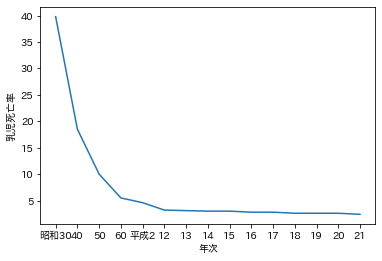

In [14]:
x=df['年次']
y=df['乳児死亡率']
ax=plt.subplot(1,1,1)
ax.plot(x,y)
ax.set_xlabel('年次')
ax.set_ylabel('乳児死亡率')
plt.show()

In [20]:
def exp_func_log(x, a, b):
    return a*np.log(x) + np.log(b)

In [21]:
def exp_func_log_fit(val1_quan, val2_quan):
    l_popt, l_pcov = curve_fit(exp_func_log, val1_quan, np.log(val2_quan), maxfev=10000, check_finite=False)
    return exp_func_log(val1_quan, *l_popt),l_popt

In [22]:
def log_to_exp(x,a,b):
    return np.exp(a*np.log(x) + np.log(b))

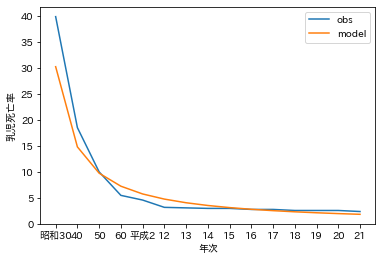

a : -1.0281998833713129,   b : 30.192843963033592


In [23]:
x=df['年次']
x2=df['rank']
y=df['乳児死亡率']
y_fit,l_popt=exp_func_log_fit(x2,y)
y_fit=log_to_exp(x2,l_popt[0],l_popt[1])

ax=plt.subplot(1,1,1)
ax.plot(x,y,label='obs')
ax.plot(x,y_fit,label='model')
ax.set_xlabel('年次')
ax.set_ylabel('乳児死亡率')
plt.legend()
plt.show()
print('a : {},   b : {}'.format(l_popt[0],l_popt[1]))

In [24]:
def exp_func(x, a, b):
    return b*(x**a)

In [25]:
def exp_fit(val1_quan, val2_quan):
    l_popt, l_pcov = curve_fit(exp_func, val1_quan, val2_quan, maxfev=10000, check_finite=False)
    return exp_func(val1_quan, *l_popt),l_popt

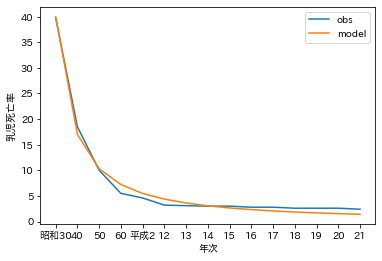

a : -1.2352257297209968,   b : 39.99372975107815


In [26]:
x=df['年次']
x2=df['rank']
y=df['乳児死亡率']
y_fit,l_popt=exp_fit(x2,y)

ax=plt.subplot(1,1,1)
ax.plot(x,y,label='obs')
ax.plot(x,y_fit,label='model')
ax.set_xlabel('年次')
ax.set_ylabel('乳児死亡率')
plt.legend()
plt.show()
print('a : {},   b : {}'.format(l_popt[0],l_popt[1]))

,年次,乳児死亡数（人）,乳児死亡数（千人）,乳児死亡率,rank
3,昭和30,68801,69,39.8,1
4,40,33742,34,18.5,2
5,50,19103,19,10.0,3
6,60,7899,8,5.5,4
7,平成2,60000,6,4.6,5
8,12,3830,4,3.2,6
9,13,40000,4,3.1,7
10,14,3497,3,3.0,8
11,15,20000,3,3.0,9
12,16,3122,3,2.8,10


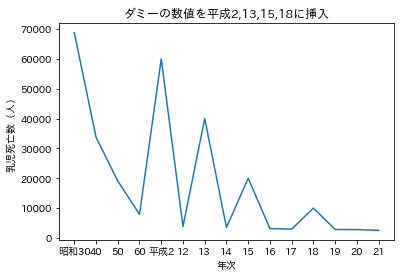

In [64]:
df=pd.read_csv('乳児死亡率.csv',encoding='cp932')
df=df.iloc[3:18,:].rename(columns={'第1-1-6図　乳児死亡数・死亡率の推移':'年次'\
                                 ,'Unnamed: 1':'乳児死亡数（人）'\
                                 ,'Unnamed: 2':'乳児死亡数（千人）'\
                                 ,'Unnamed: 3':'乳児死亡率'})
# 後々の処理のために連番カラム作成
rank=range(1,len(df)+1)
df['rank']=rank
# すべてのカラムがobject型なので乳児死亡率をfloat型に
df['乳児死亡率']=df['乳児死亡率'].astype(float)
df['乳児死亡数（人）']=df['乳児死亡数（人）'].str.replace(',','').astype(np.int)

# ダミーデータを挿入する
df2=df.copy()
df2.loc[df2['年次']=='平成2', '乳児死亡数（人）']=60000
df2.loc[df2['年次']=='13', '乳児死亡数（人）']=40000
df2.loc[df2['年次']=='15', '乳児死亡数（人）']=20000
df2.loc[df2['年次']=='18', '乳児死亡数（人）']=10000
display(df2)

x=df2['年次']
y=df2['乳児死亡数（人）']
ax=plt.subplot(1,1,1)
ax.plot(x,y)
ax.set_xlabel('年次')
ax.set_ylabel('乳児死亡数（人）')
ax.set_title('ダミーの数値を平成2,13,15,18に挿入')
plt.show()

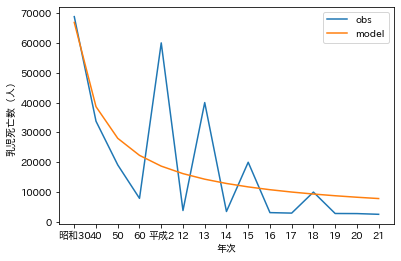

a : -0.7916439659435447,   b : 66854.35845959891


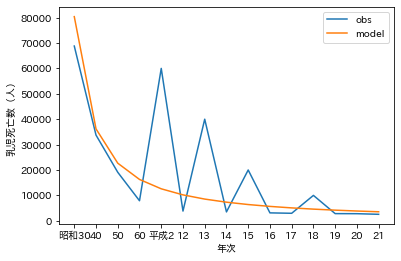

a : -1.1516001225868837,   b : 80380.44848731253


In [65]:
# 非線形回帰
x=df2['年次']
x2=df2['rank']
y=df2['乳児死亡数（人）']
y_fit,l_popt=exp_fit(x2,y)

ax=plt.subplot(1,1,1)
ax.plot(x,y,label='obs')
ax.plot(x,y_fit,label='model')
ax.set_xlabel('年次')
ax.set_ylabel('乳児死亡数（人）')
plt.legend()
plt.show()
print('a : {},   b : {}'.format(l_popt[0],l_popt[1]))

# 対数変換線形回帰
x=df2['年次']
x2=df2['rank']
y=df2['乳児死亡数（人）']
y_fit,l_popt=exp_func_log_fit(x2,y)
y_fit=log_to_exp(x2,l_popt[0],l_popt[1])

ax=plt.subplot(1,1,1)
ax.plot(x,y,label='obs')
ax.plot(x,y_fit,label='model')
ax.set_xlabel('年次')
ax.set_ylabel('乳児死亡数（人）')
plt.legend()
plt.show()
print('a : {},   b : {}'.format(l_popt[0],l_popt[1]))